<a href="https://colab.research.google.com/github/smoothbear/big_data/blob/main/lotto_crawling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
url = r'http://www.pythonscraping.com/pages/warandpeace.html'
req = requests.get(url)

if req.status_code == requests.codes.ok:
    soup = BeautifulSoup(req.text, 'lxml')

In [ ]:
h1 = soup.find('h1').text
h1

'War and Peace'

In [ ]:
green = soup.find_all("span", {"class":"green"})
print(green)
for g in green:
    print(g.text)

[<span class="green">Anna
Pavlovna Scherer</span>, <span class="green">Empress Marya
Fedorovna</span>, <span class="green">Prince Vasili Kuragin</span>, <span class="green">Anna Pavlovna</span>, <span class="green">St. Petersburg</span>, <span class="green">the prince</span>, <span class="green">Anna Pavlovna</span>, <span class="green">Anna Pavlovna</span>, <span class="green">the prince</span>, <span class="green">the prince</span>, <span class="green">the prince</span>, <span class="green">Prince Vasili</span>, <span class="green">Anna Pavlovna</span>, <span class="green">Anna Pavlovna</span>, <span class="green">the prince</span>, <span class="green">Wintzingerode</span>, <span class="green">King of Prussia</span>, <span class="green">le Vicomte de Mortemart</span>, <span class="green">Montmorencys</span>, <span class="green">Rohans</span>, <span class="green">Abbe Morio</span>, <span class="green">the Emperor</span>, <span class="green">the prince</span>, <span class="green">Princ

In [ ]:
import csv
csvFile = open(r"/content/drive/MyDrive/data.csv", 'w+')
try:
    writer = csv.writer(csvFile)
    writer.writerow(('First', 'Second', 'Third'))

    for i in range(10):
        writer.writerow((i, i+10, i+100))
except ValueError as e:
    print(e, type(e))

finally:
    csvFile.close()

In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver

     |████████████████████████████████| 911kB 6.5MB/s 
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ P

In [ ]:
from selenium import webdriver
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
from urllib.parse import quote_plus
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException

In [ ]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: use options instead of chrome_options
  """


In [ ]:
result = {
    "1~10": 0,
    "11~21": 0,
    "22~30": 0,
    "31~40": 0,
    "41~45": 0,
}

currentPage = 1
isContinued = True

while isContinued:
    url = f'https://dhlottery.co.kr/gameResult.do?method=statByColor&sortOrder=DESC&startPage=1&endPage=10&currentPage={currentPage}'
    driver.get(url)
    currentPage += 1
    for i in range(1, 10):
        try:
            content = driver.find_element_by_css_selector(f'#article > div:nth-child(2) > div > table > tbody > tr:nth-child({i})')
        except NoSuchElementException:
            isContinued = False
            break
        
        arr = content.text.split()
        print(arr)
        
        for i in arr[2:8]:
            i = int(i)
            if i <= 10:
                result["1~10"] += 1
            elif i <= 21:
                result["11~21"] += 1
            elif i <= 30:
                result["22~30"] += 1
            elif i <= 40:
                result["31~40"] += 1
            elif i > 40:
                result["41~45"] += 1


result


['961', '2021-05-01', '11', '20', '29', '31', '33', '42', '43']
['960', '2021-04-24', '2', '18', '24', '30', '32', '45', '14']
['959', '2021-04-17', '1', '14', '15', '24', '40', '41', '35']
['958', '2021-04-10', '2', '9', '10', '16', '35', '37', '1']
['957', '2021-04-03', '4', '15', '24', '35', '36', '40', '1']
['956', '2021-03-27', '10', '11', '20', '21', '25', '41', '40']
['955', '2021-03-20', '4', '9', '23', '26', '29', '33', '8']
['954', '2021-03-13', '1', '9', '26', '28', '30', '41', '32']
['953', '2021-03-06', '7', '9', '22', '27', '37', '42', '34']
['951', '2021-02-20', '2', '12', '30', '31', '39', '43', '38']
['950', '2021-02-13', '3', '4', '15', '22', '28', '40', '10']
['949', '2021-02-06', '14', '21', '35', '36', '40', '44', '30']
['948', '2021-01-30', '13', '18', '30', '31', '38', '41', '5']
['947', '2021-01-23', '3', '8', '17', '20', '27', '35', '26']
['946', '2021-01-16', '9', '18', '19', '30', '34', '40', '20']
['945', '2021-01-09', '9', '10', '15', '30', '33', '37', '26'

{'11~21': 1302, '1~10': 1133, '22~30': 996, '31~40': 1178, '41~45': 581}

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
import matplotlib as mpl # 기본 설정 만지는 용도
import matplotlib.pyplot as plt # 그래프 그리는 용도
import matplotlib.font_manager as fm # 폰트 관련 용도

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic Eco


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49353 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49353 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_te

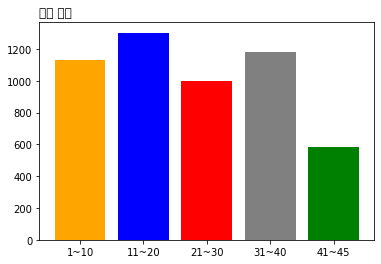

In [ ]:
names = ['1~10', '11~20', '21~30', '31~40', '41~45']
values = [ result["1~10"], result["11~21"], result['22~30'], result['31~40'], result['41~45'] ]
colors = ['orange', 'blue', 'red', 'grey', 'green']
plt.bar(names, values, color=colors)
plt.show()